# Seattle Building Permits

I've been wanting to do some research into the building boom here in Seattle for a while.  Thanks to the city's [open data initiative](https://data.seattle.gov/browse?sortBy=most_accessed&sortPeriod=week) powered by Socrata, there is readily available information to get started.  Perhaps ultimately this could be tied into a larger project around affordable housing.  I know that there is a basic supply and demand arguement to be made for how all these cranes are going to help the situation, but just based on my own observations, there seem to be way more luxury high rises than modest housing units going up.

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import re

## Get Data

In [3]:
api_endpoint = "https://data.seattle.gov/resource/i5jq-ms7b.json"
permits = pd.read_json(api_endpoint)
permits.head()

,:@computed_region_2day_rhn5,:@computed_region_cyqu_gs94,:@computed_region_kuhn_3gp2,:@computed_region_q256_3sug,action_type,address,applicant_name,application_date,application_permit_number,category,...,latitude,location,location_address,longitude,master_use_permit,permit_and_complaint_status_url,permit_type,status,value,work_type
0,NaN,NaN,28.0,18792.0,NEW,1233 NE 88TH ST,"BIDDLE, DAVE",2016-12-19T00:00:00.000,6564183,SINGLE FAMILY / DUPLEX,...,47.691846,"{'type': 'Point', 'coordinates': [-122.313688,...",1233 NE 88TH ST,-122.313688,3025890.0,http://web6.seattle.gov/dpd/PermitStatus/Proje...,Construction,Application Accepted,478973,Plan Review
1,NaN,NaN,48.0,18792.0,ADD/ALT,6008 29TH AVE NE,"JACKSON, LEIF",2016-12-21T00:00:00.000,6563910,SINGLE FAMILY / DUPLEX,...,47.672460,"{'type': 'Point', 'coordinates': [-122.29612, ...",6008 29TH AVE NE,-122.296120,NaN,http://web6.seattle.gov/dpd/PermitStatus/Proje...,Construction,Permit Issued,5655,Plan Review
2,NaN,NaN,13.0,18385.0,ADD/ALT,5214 DELRIDGE WAY SW,"MIHLON, MATTHEW D",2016-09-12T00:00:00.000,6536904,COMMERCIAL,...,47.554495,"{'type': 'Point', 'coordinates': [-122.362727,...",5214 DELRIDGE WAY SW,-122.362727,NaN,http://web6.seattle.gov/dpd/PermitStatus/Proje...,Construction,Permit Issued,5000,Plan Review
3,NaN,NaN,43.0,18800.0,ADD/ALT,5425 57TH AVE S,"MOODY, WILLIAM",2017-01-23T00:00:00.000,6561114,SINGLE FAMILY / DUPLEX,...,47.552729,"{'type': 'Point', 'coordinates': [-122.262284,...",5425 57TH AVE S,-122.262284,NaN,http://web6.seattle.gov/dpd/PermitStatus/Proje...,Construction,Permit Issued,1000,No plan review
4,NaN,NaN,7.0,18390.0,SHORELINE EXEMPTION ONLY,2145R WESTLAKE AVE N,"ANTIEAU, CLAYTON",2017-02-07T00:00:00.000,6562603,NaN,...,47.638863,"{'type': 'Point', 'coordinates': [-122.341316,...",2145R WESTLAKE AVE N,-122.341316,NaN,http://web6.seattle.gov/dpd/PermitStatus/Proje...,Site Development,AP Closed,0,Plan Review


## Data Cleaning

In [4]:
permits.columns

Index([':@computed_region_2day_rhn5', ':@computed_region_cyqu_gs94',
       ':@computed_region_kuhn_3gp2', ':@computed_region_q256_3sug',
       'action_type', 'address', 'applicant_name', 'application_date',
       'application_permit_number', 'category', 'contractor', 'description',
       'expiration_date', 'final_date', 'issue_date', 'latitude', 'location',
       'location_address', 'longitude', 'master_use_permit',
       'permit_and_complaint_status_url', 'permit_type', 'status', 'value',
       'work_type'],
      dtype='object')

In [5]:
# drop the first 4 columns
permits = permits.iloc[:, 4:]

#extract just date from application timestamp
def extract_dt(timestamp):
    if pd.isnull(timestamp):
        return np.nan
    else:
        date_str = re.sub(r"([0-9]{4}-[0-9]{2}-[0-9]{2})(.*)", r"\1", timestamp)
        return datetime.strptime(date_str, "%Y-%m-%d")

permits['app_date_cleaned'] = [extract_dt(elem) for elem in permits.application_date]

In [6]:
permits.app_date_cleaned[1:10]

1   2016-12-21
2   2016-09-12
3   2017-01-23
4   2017-02-07
5          NaT
6   2017-02-07
7   2016-03-25
8          NaT
9          NaT
Name: app_date_cleaned, dtype: datetime64[ns]

## EDA

In [7]:
permits.shape

(1000, 22)

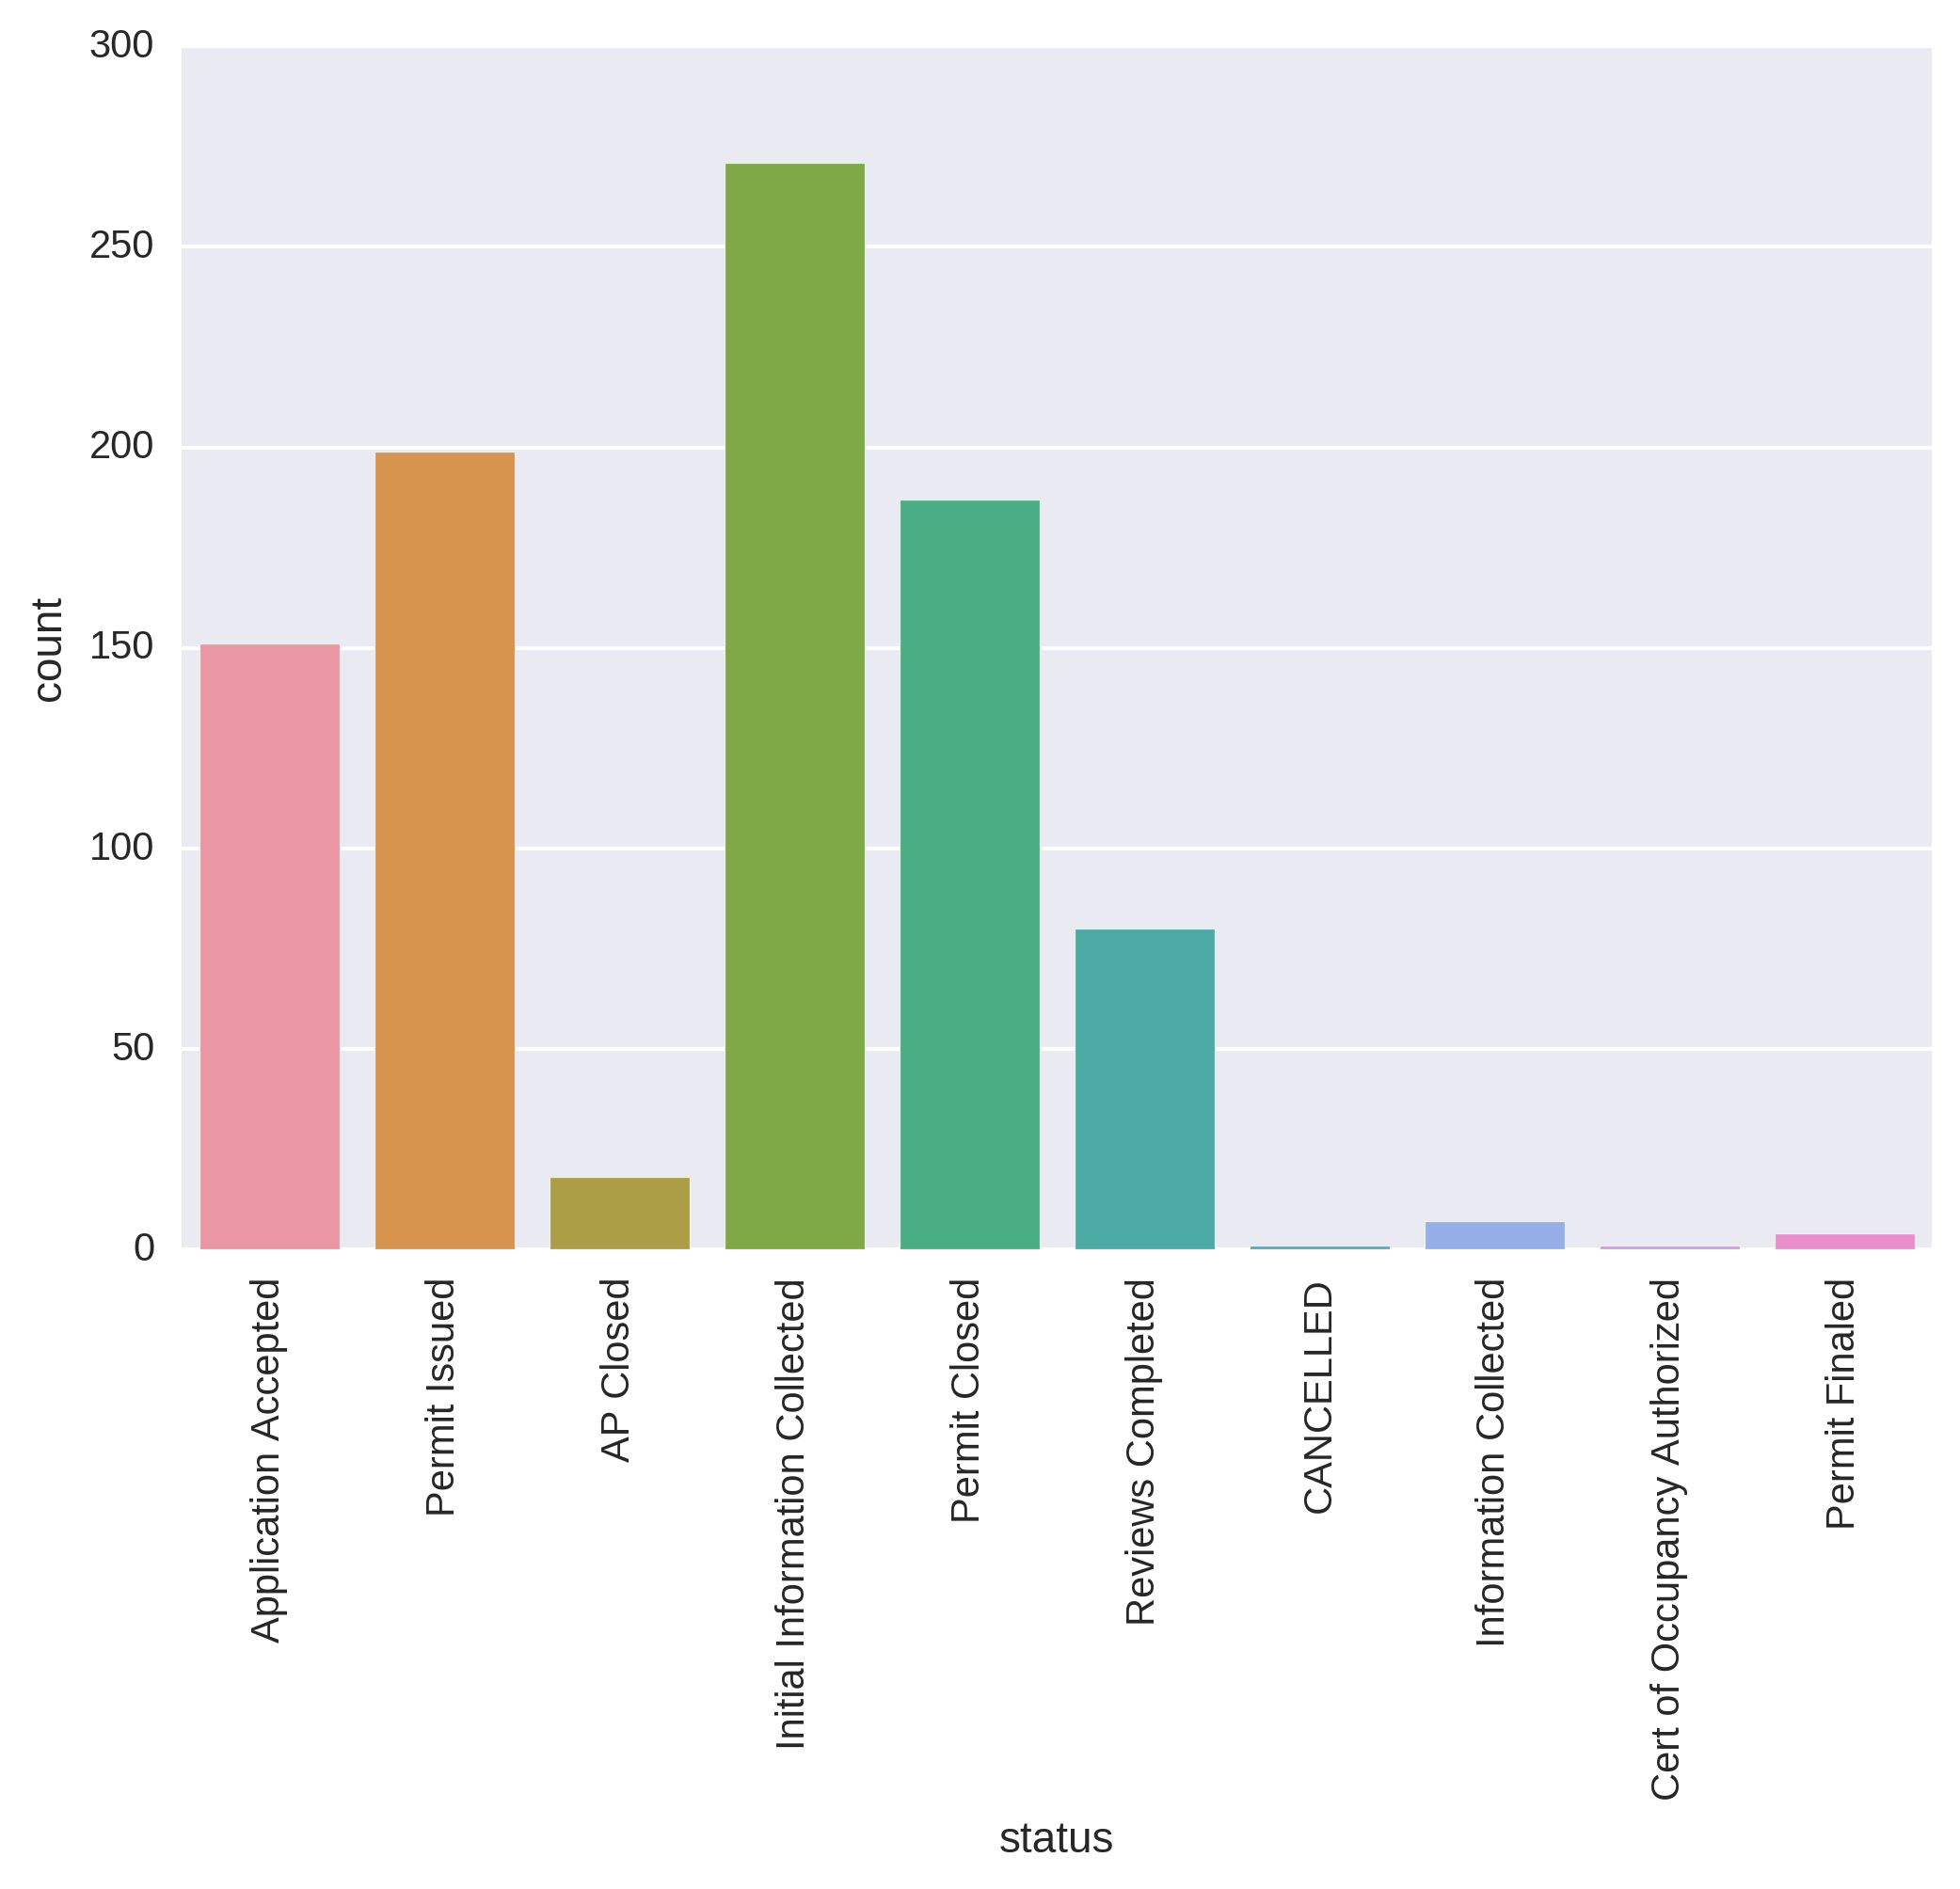

In [8]:
# distribution of permit status
sns.countplot(x = "status", data = permits)
plt.xticks(rotation = 90)
plt.show()

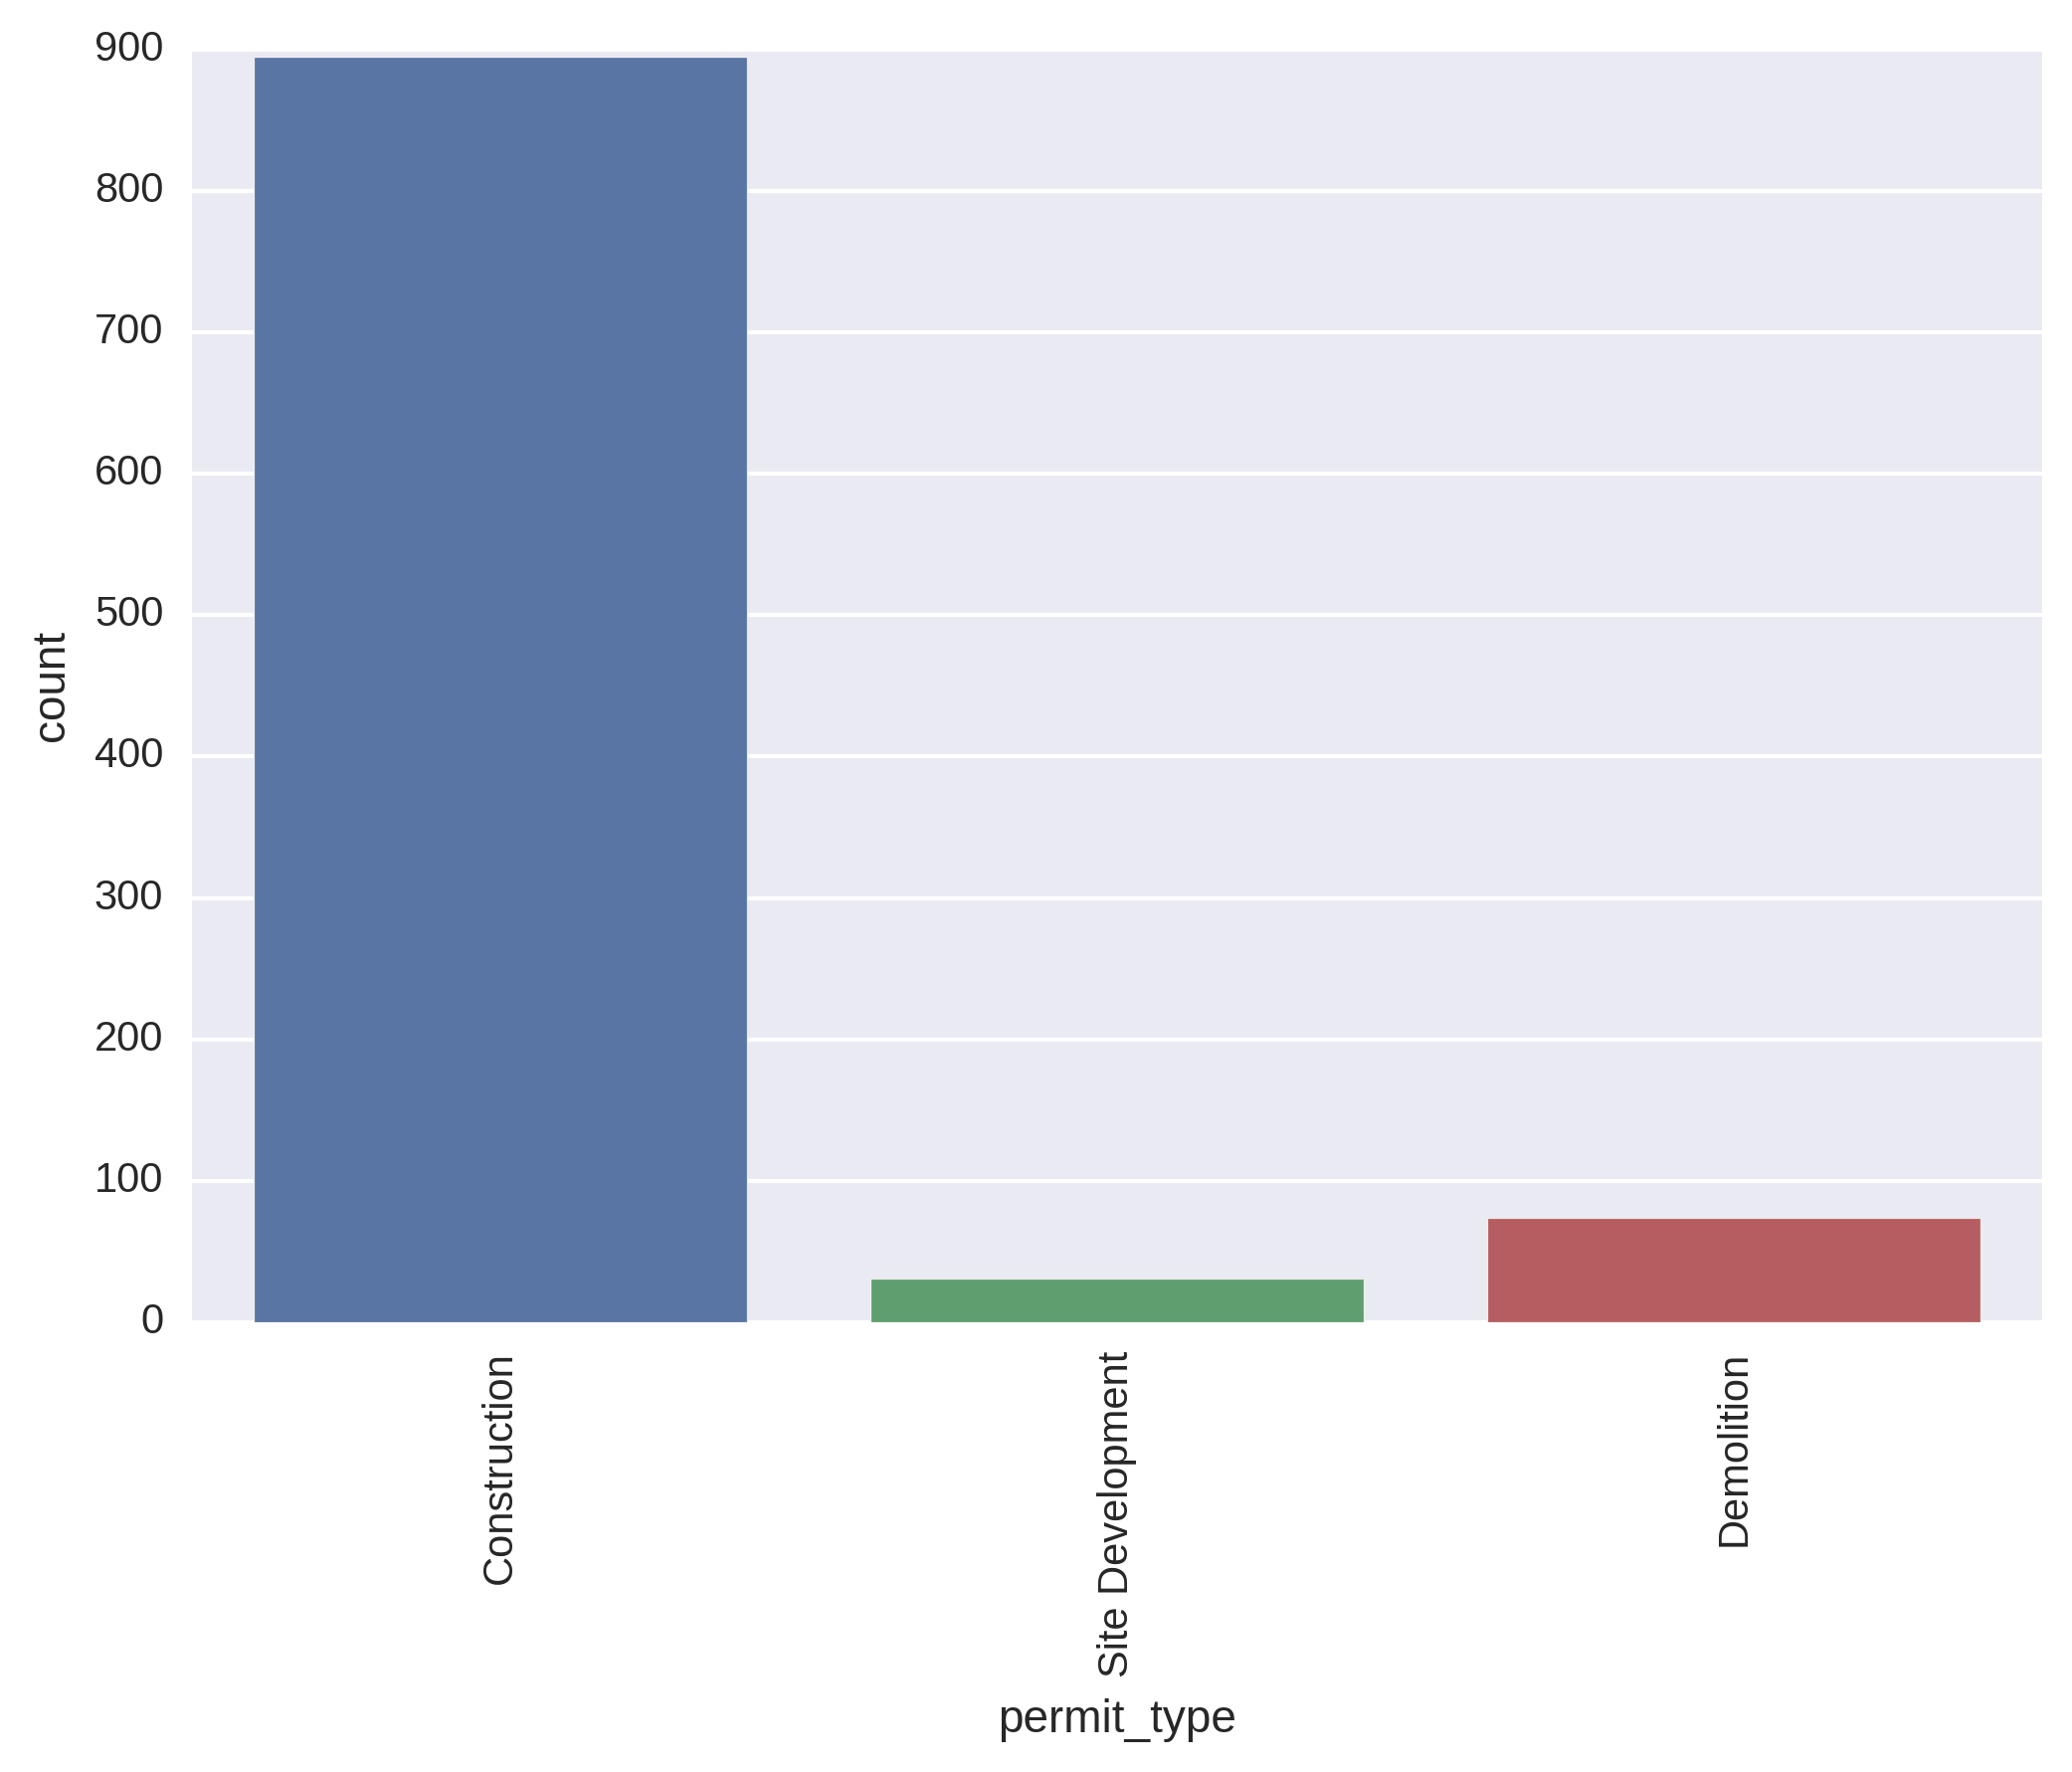

In [9]:
sns.countplot(x = "permit_type", data = permits)
plt.xticks(rotation = 90)
plt.show()

In [12]:
#figure out how many individual contractors there are
print("Number of idividual contractors: {}".format(permits.contractor.nunique()))

#and here are  the companies
permits.contractor.unique()

Number of idividual contractors: 105


array([nan, 'CITY OF SEA SPU DRAIN & WASTE', 'DUET DESIGN AND BUILD LLC',
       'U OF W BUILDING PERMIT', 'CHRIS LEWIS', 'POLYGON WLH LLC',
       'KING CO WASTEWATER TRTMNT DIV', 'SEISMIC NORTHWEST',
       'WINFIELD HOMES, LLC', 'SEATTLE CITY LIGHT', 'BLANKET: SODO CENTER',
       'RYAN VYTLACIL', 'SOCKEYE HOMES', "BLANKET: MACY'S",
       'ACH HOMES LLC', 'CITY OF SEA F&FD', 'BLANKET: ONE UNION SQUARE',
       'SEATTLE PARKS DEPT', 'ELITE COMMERCIAL CONTRACTING',
       'PORT OF SEATTLE ENGINEERING', 'ACE CONSTRUCTION SERVICES LLC',
       'TERHUNE HOMES INC', 'PROVIDENCE HEALTH & SERVICES',
       'SEATTLE TRANSPORTATION', 'BETTER BUILDERS',
       'BLANKET: TWO UNION SQUARE',
       'ACORN DEVELOPMENT LLC(BLOCK21), GLY CONSTRUCTION',
       'D P INCORPORATED', 'MIGHTY HOUSE CONSTRUCTION',
       'EUGENE SHERMAN & ASSOC LLC', 'PRESTIGE GENERAL CONTRS LLC',
       'GIBRALTAR MAINT & CONST INC, J M S CONSTRUCTION CO',
       'W G CLARK CONSTRUCTION CO', 'SAGE HOMES NORTHWEST LLC',
 

In [47]:
#lets see who is currently building the most
contractors = permits[permits.status == "Permit Issued"].groupby(by = ['contractor'])
print("number of contractors with issued permits: \t{}".format(contractors.ngroups))

number of contractors with issued permits: 	27


In [87]:
#number of permits issued to contractors
#who is building what
permits[permits.status == "Permit Issued"].groupby('contractor').size()

contractor
800 FIFTH AVENUE                  1
ACE CONSTRUCTION SERVICES LLC     2
BAKSTAD CONSTRUCTION LLC          1
BLANKET: 1111 THIRD AVE BLDG      1
BLANKET: 901 5TH AVE              1
BLANKET: MARKET PLACE TOWER       1
BLANKET: SODO CENTER              1
BURGESS DESIGN, INC               1
CENTRAL PUGET SOUND TRANSIT       1
CITY OF SEA F&FD                  4
DIAMONDBACK CONSTRUCTION LLC      1
ELITE COMMERCIAL CONTRACTING      3
EXCAVATORS NORTHWEST              1
FOUR TEN, LLC                     1
G L Y CONSTRUCTION INC            1
GPROJECTS LLC                     3
J T M CONSTRUCTION                1
LENHARDT CONSTRUCTION & DESIGN    1
POLYGON WLH LLC                   1
PROVIDENCE HEALTH & SERVICES      1
PSF MECHANICAL INC                1
SEATTLE CHILDREN'S HOSPITAL       1
SEATTLE CITY LIBRARY              1
SEISMIC NORTHWEST                 2
SELLEN CONSTRUCTION CO INC        1
SIERRA CONSTRUCTION CO INC        1
THE WRIGHTWORKS LLC               1
dtype: int64